<a href="https://colab.research.google.com/github/vdslab/hyperbolic-tree/blob/main/ipynb/visdata_top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install nltk
!pip3 install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 24.1 MB 437 kB/s 
     |████████████████████████████████| 5.2 MB 54.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 52.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340733 sha256=da07b55495657155bd4d0b4a8ee88cd057779a344d536814602b55b20fced00a
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=82865b30367f9d37431165a34828af1887d98a9b26fcb6857536c0495021c7c6
  Stored in dir

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import csv
import pandas as pd
with open('/content/drive/MyDrive/Colab Notebooks/pre-judgit/IEEE VIS papers 1990-2020 - Main dataset.csv', 'r')as f:
    df = pd.read_csv(f)

In [11]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
stem = PorterStemmer()
lem = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(word_tokenize(sentence.lower())):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

## 名詞だけ抽出

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
stem = PorterStemmer()
lem = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(word_tokenize(sentence.lower())):
        if tag.startswith('NN'):
            pos = 'n'
            lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [12]:
documents = []
plot_titles = []
plot_ids = []
for i, (title, abstract) in enumerate(zip(df['Title'], df['Abstract'])):
    if type(abstract) == str:
        documents.append(' '.join(lemmatize_sentence(abstract)))
        plot_titles.append(title)
        plot_ids.append(i)

top2vec内のdoc2vec_argsのパラメータ　\
"vector_size": 50, \
"min_count": min_count, \
"window": 15, \
"sample": 1e-3, \
"negative": negative, \
"hs": hs, \
"epochs": epochs, \
"seed": seed, //ここを弄る \
"dm": 0, \
"dbow_words": 1 \
min_alpha４箇所全てを0.0001に変更 

In [ ]:
from top2vec import Top2Vec
seed = 1
while len(model.topic_sizes) < 10:
    seed += 1
    model = Top2Vec(documents,
                    seed = seed,
                    workers = 1,
                    speed = 'deep-learn',
                    umap_args = {'n_neighbors': 15,
                                    'n_components': 5,
                                    'metric': 'cosine',
                                    'random_state': 42})
    print(model.topic_sizes)
    print('')

2022-11-14 15:42:13,741 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-11-14 15:42:15,034 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-14 16:24:16,141 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-14 16:24:30,085 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-14 16:24:30,186 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2022-11-14 16:24:30,211 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


0    2835
1     486
dtype: int64



2022-11-14 16:24:31,486 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-14 17:06:27,439 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-14 17:06:41,237 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-14 17:06:41,331 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


0     249
1     246
2     240
3     213
4     211
5     209
6     203
7     184
8     182
9     152
10    149
11    148
12    137
13    130
14    125
15    101
16     94
17     93
18     91
19     87
20     77
dtype: int64



In [ ]:
from top2vec import Top2Vec
model = Top2Vec(documents,
                seed = 3,
                workers = 1,
                speed = 'deep-learn',
                umap_args = {'n_neighbors': 15,
                                'n_components': 5,
                                'metric': 'cosine',
                                'random_state': 42})
print(model.topic_sizes)
print('')

2022-11-14 19:01:46,809 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-11-14 19:01:48,084 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-14 19:45:04,348 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-14 19:45:24,730 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-14 19:45:24,824 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


0     249
1     246
2     240
3     213
4     211
5     209
6     203
7     184
8     182
9     152
10    149
11    148
12    137
13    130
14    125
15    101
16     94
17     93
18     91
19     87
20     77
dtype: int64



In [ ]:
model.document_vectors[0]

array([-0.00903811,  0.16831522,  0.0666273 ,  0.26149452,  0.17506468,
        0.14169979,  0.09191544,  0.00187921,  0.12006515,  0.02243702,
        0.02155524, -0.08000486, -0.1293307 , -0.39424184, -0.13278708,
       -0.05302667,  0.03094774, -0.12446646,  0.1633705 , -0.09070291,
        0.13633046,  0.02129253, -0.02443646,  0.03828471, -0.06371574,
       -0.07416432,  0.11379147, -0.22991867,  0.19989388, -0.01210664,
       -0.0721283 ,  0.14726578, -0.01693039, -0.2334772 , -0.17029455,
        0.02540668,  0.31061926, -0.21744022,  0.2220594 ,  0.08283228,
        0.15610594, -0.09117693, -0.07640602,  0.02866536,  0.11233375,
        0.24366455,  0.05585946, -0.08287763, -0.05865205, -0.03512023],
      dtype=float32)

In [ ]:
model.topic_sizes

0    2869
1     452
dtype: int64

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/tdb/221109/visdata_top2vec_221115.model')

In [4]:
from top2vec import Top2Vec
model = Top2Vec.load('/content/drive/MyDrive/Colab Notebooks/tdb/221109/visdata_top2vec_221115.model')

In [ ]:
for i, topics in enumerate(model.topic_words):
    print(f"topic {i}")
    print(f"{topics}")
    print(f"")

In [7]:
from nltk.corpus import stopwords
topic = []
for words, scores in zip(model.topic_words, model.topic_word_scores):
    tmp = {}
    for word, score in zip(words, scores):
        tmp[word] = score
    topic.append(tmp)

stopset = set(stopwords.words('english'))
for words in topic:
    for word in list(words.keys()):
        if word in stopset:
            words.pop(word)

In [8]:
for i, words in enumerate(topic):
    print(f"topic {i}, {len(words)} words")
    print(f"{words}")
    print(f"")

topic 0, 196 words
{'thinking': 0.712724, 'inquiry': 0.7062432, 'inform': 0.6957643, 'critique': 0.67855954, 'thought': 0.66152143, 'workshop': 0.653801, 'infovis': 0.64018714, 'creativity': 0.63602984, 'methodological': 0.6276614, 'intelligence': 0.6181825, 'casual': 0.6149014, 'engage': 0.6115216, 'sensemaking': 0.61137664, 'stakeholder': 0.6068097, 'designer': 0.5920381, 'claim': 0.5912612, 'taxonomy': 0.5911727, 'evaluator': 0.5902288, 'situate': 0.5887523, 'pave': 0.5876052, 'visitor': 0.58623385, 'pitfall': 0.58618444, 'collaborative': 0.58593565, 'audience': 0.58317685, 'outcomes': 0.5798744, 'collaboration': 0.5794519, 'opportunity': 0.578568, 'elicit': 0.57710856, 'goal': 0.57234913, 'finding': 0.57115096, 'collaborator': 0.56819993, 'funding': 0.56484693, 'lesson': 0.56333864, 'engagement': 0.5626344, 'implication': 0.5605835, 'foster': 0.5593393, 'panelist': 0.5581602, 'action': 0.55734605, 'visceralization': 0.5572002, 'interpretivist': 0.55492735, 'redesign': 0.55427533, '

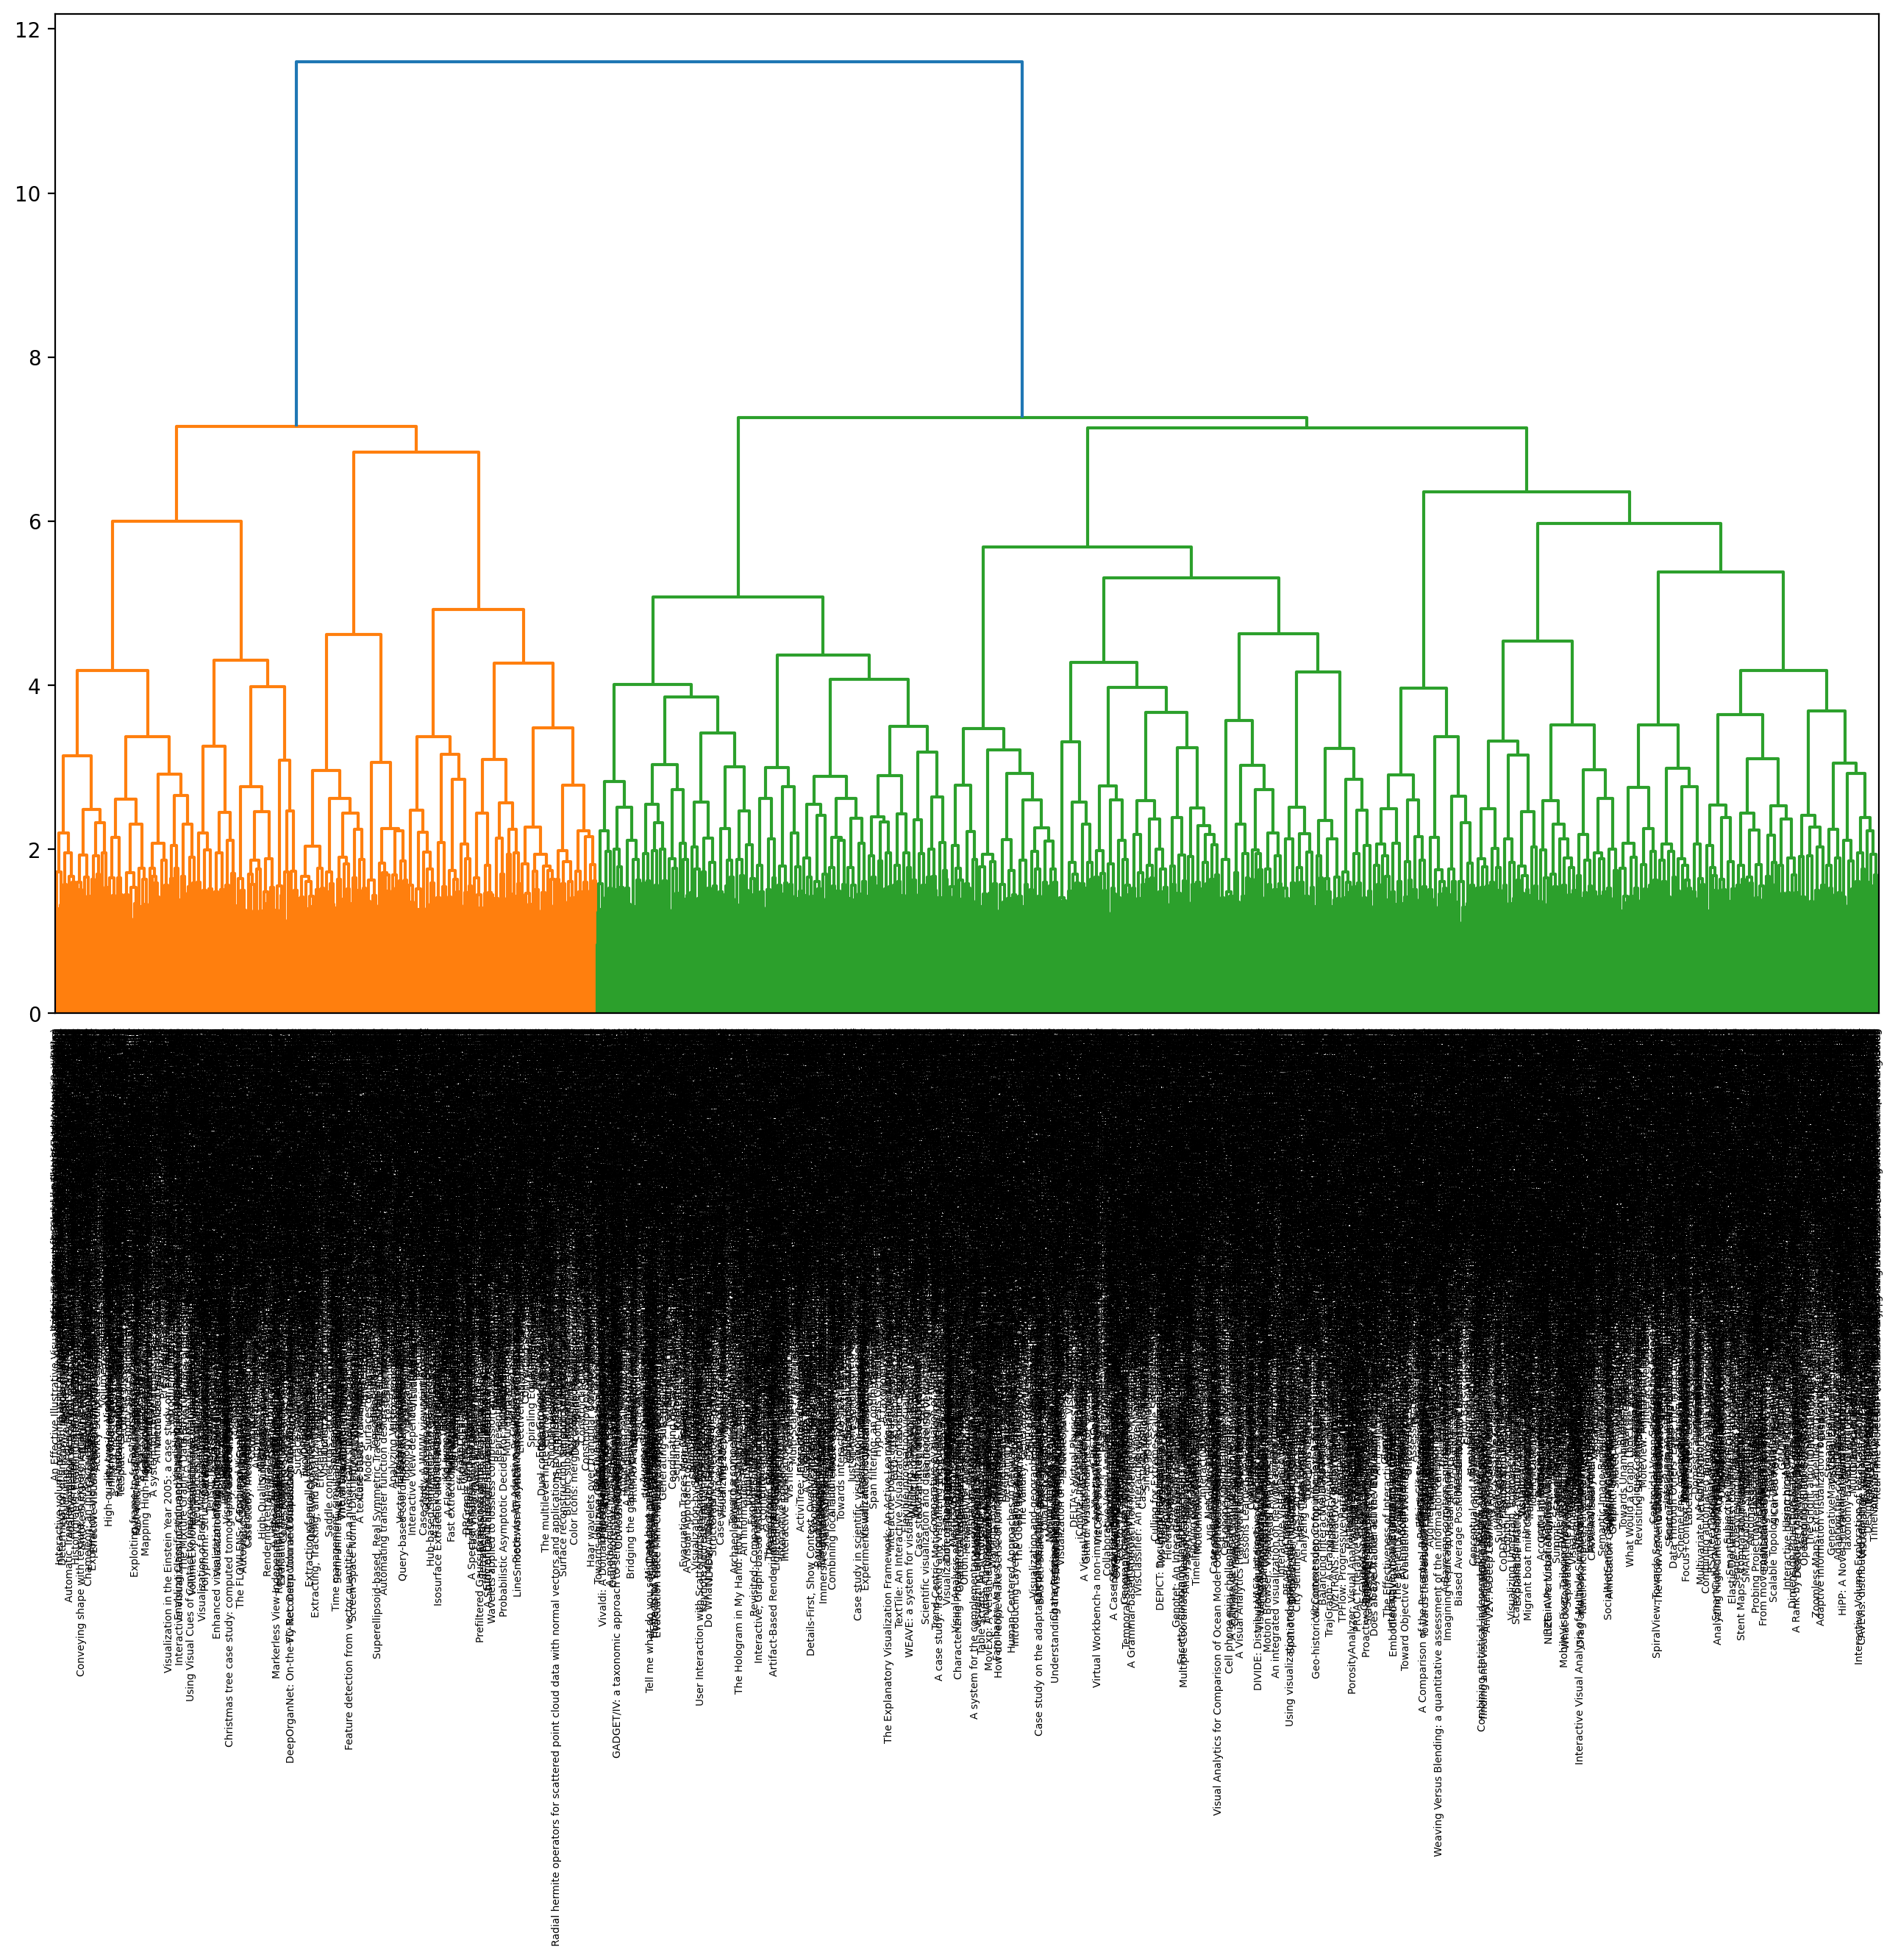

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(model.document_vectors, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=plot_titles)
plt.show()

In [ ]:
word_score = {}
i = 1337
topic_nums, topic_score, topic_words, word_scores = model.get_documents_topics(doc_ids=[i], num_topics=100)
for weight, words, scores in zip(topic_score[0], topic_words[0], word_scores[0]):
    # if weight < 0:
    #     continue
    for word, score in zip(words, scores):
        if word not in word_score:
            word_score[word] = 0
        word_score[word] += weight * score

tmp = sorted([(word, word_score[word]) for word in set(model.documents[i].split()) if word in word_score and word_score[word] > 0], key=lambda item: item[1], reverse=True)

In [ ]:
tmp

[('systematic', 0.16163419932127), ('set', 0.08739215135574341)]

In [ ]:
model.get_topics()[0]

array([['thinking', 'inquiry', 'inform', ..., 'smartwatch', 'reflect',
        'attitude'],
       ['mesh', 'triangulation', 'triangle', ..., 'streaming', 'sharp',
        'partitioning'],
       ['rasterization', 'render', 'rendering', ..., 'intensity', 'ewa',
        'surfaces'],
       ...,
       ['projector', 'tiled', 'photometrically', ..., 'blend', 'freedom',
        'fixed'],
       ['bcc', 'cubic', 'spline', ..., 'lossless', 'formula', 'lbm'],
       ['player', 'coach', 'tennis', ..., 'visitor', 'expandable',
        'green']], dtype='<U15')

In [ ]:
set(model.documents[1337].split())

{',',
 '.',
 'a',
 'access',
 'account',
 'aim',
 'and',
 'be',
 'construct',
 'context',
 'data',
 'describe',
 'detail',
 'different',
 'focus+context',
 'for',
 'formal',
 'framework',
 'give',
 'i.e',
 'in',
 'information',
 'integrate',
 'introduce',
 'notion',
 'of',
 'order',
 'paper',
 'provide',
 'second-order',
 'set',
 'systematic',
 'technique',
 'that',
 'the',
 'there',
 'this',
 'to',
 'user',
 'visual',
 'visualization',
 'we',
 'which',
 'with'}

In [ ]:
model.documents[1337]

In [ ]:
model.get_documents_topics(doc_ids=[1337], num_topics=100)

(array([[ 9,  3,  0,  7,  6, 14, 19,  1,  4,  5, 12, 18,  2,  8, 11, 10,
         13, 15, 20, 16, 17]]),
 array([[ 0.3367077 ,  0.30149892,  0.24128926,  0.23969212,  0.23783827,
          0.22016011,  0.20036778,  0.18327281,  0.13271235,  0.05545883,
          0.03918118,  0.02849133,  0.00281274, -0.00263282, -0.04251678,
         -0.05787744, -0.07656335, -0.0828492 , -0.09206813, -0.13126943,
         -0.15588939]], dtype=float32),
 array([[['document', 'word', 'retrieved', ..., 'humanity', 'slide',
          'semantically'],
         ['script', 'modular', 'language', ..., 'syntax', 'browser',
          'applications'],
         ['thinking', 'inquiry', 'inform', ..., 'smartwatch', 'reflect',
          'attitude'],
         ...,
         ['player', 'coach', 'tennis', ..., 'visitor', 'expandable',
          'green'],
         ['mini', 'contest', 'vast', ..., 'investigative', 'platform',
          'wrangling'],
         ['forecast', 'ensemble', 'weather', ..., 'analyst', 'glos',
    

In [26]:
obj = []
for i, (id, title, document) in enumerate(zip(plot_ids, plot_titles, documents)):
    word_score = {}
    topic_nums, topic_score, topic_words, word_scores = model.get_documents_topics(doc_ids=[i], num_topics=100)
    for weight, words, scores in zip(topic_score[0], topic_words[0], word_scores[0]):
        # if weight < 0:
        #     continue
        for word, score in zip(words, scores):
            if word not in word_score:
                word_score[word] = 0
            word_score[word] += weight * score

    tmp = sorted([(word, word_score[word]) for word in set(model.documents[i].split()) if word in word_score and word_score[word] > 0], key=lambda item: item[1], reverse=True)

    topvec = []
    for k, v in tmp:
        topvec.append({'word':k,
                       'score':v})

    obj.append({'id':str(int(i)),
                'parent':'',
                'distance':0,
                'name':title,
                'text':document,
                'category':df['Conference'][id],
                'topic':str(topic_nums[0][0]),
                'topicScore':topvec})
    
for i in range(len(linkage_result)):
    obj.append({'id':str(len(linkage_result)+i+1),
                'parent':'',
                'distance':linkage_result[i][2],
                'name':'',
                'text':'',
                'category':'',
                'topic':'',
                'topicScore':[]
                })

for i in range(len(obj)):
    if i % 1000 == 0 :
        print('running', i)
    for j in range(len(linkage_result)):
        if int(obj[i]['id']) == linkage_result[j][0] or int(obj[i]['id']) == linkage_result[j][1]:
            obj[i]['parent'] = str(len(linkage_result)+j+1)

running 0
running 1000
running 2000
running 3000
running 4000
running 5000
running 6000


In [18]:
obj[0]

{'id': '0',
 'parent': '3770',
 'distance': 0,
 'name': 'D³ Data-Driven Documents',
 'text': 'data-driven document ( d3 ) be a novel representation-transparent approach to visualization for the web . rather than hide the underlying scenegraph within a toolkit-specific abstraction , d3 enables direct inspection and manipulation of a native representation : the standard document object model ( dom ) . with d3 , designer selectively bind input data to arbitrary document element , apply dynamic transforms to both generate and modify content . we show how representational transparency improve expressiveness and good integrates with developer tool than prior approach , while offer comparable notational efficiency and retain powerful declarative component . immediate evaluation of operator further simplifies debug and allows iterative development . additionally , we demonstrate how d3 transforms naturally enable animation and interaction with dramatic performance improvement over intermediate

In [ ]:
for o in obj[:3321]:
    if o['TopicScore'] == []:
        print(o['no'])

In [ ]:
obj[1337]

{'no': '1337',
 'parent': '4704',
 'distance': 0,
 'Title': 'A framework for focus+context visualization',
 'Abstract': 'this paper aim to give a systematic account of focus+context visualization technique , i.e . visualization which aim to give user integrate visual access to detail and context in a data set . we introduce the notion that there be different order of information visualization with focus+context be a second-order visualization and provide a formal framework for describe and construct focus+context visualization .',
 'Conference': 'InfoVis',
 'TopicScore': [{'word': 'systematic', 'score': 0.16163419932127},
  {'word': 'set', 'score': 0.08739215135574341}]}

In [ ]:
import json
with open('../../public/data/visdata221109.json', 'w', encoding='utf8')as f:
    json.dump(obj, f, indent=2, ensure_ascii=False)

# TF-IDFの計算

In [27]:
import copy
test = copy.deepcopy(obj)
for t in test:
    t['child'] = [t['id']]
for t in test:
    try:
        test[int(t['parent'])]['child'].append(t['id'])
    except:
        print(t)
for t in test:
    tmp = []
    for i in range(1, len(t['child'])):
        tmp += test[int(t['child'][i])]['child']
    if tmp != []:
        t['child'] = tmp

{'id': '6640', 'parent': '', 'distance': 11.598415372223842, 'name': '', 'text': '', 'category': '', 'topic': '', 'topicScore': [], 'child': ['6640', '6638', '6639']}


In [28]:
def tokenize(sentence):
    return sentence.split()

In [ ]:
test[1337]

{'no': '1337',
 'parent': '4704',
 'distance': 0,
 'Title': 'A framework for focus+context visualization',
 'Abstract': 'this paper aim to give a systematic account of focus+context visualization technique , i.e . visualization which aim to give user integrate visual access to detail and context in a data set . we introduce the notion that there be different order of information visualization with focus+context be a second-order visualization and provide a formal framework for describe and construct focus+context visualization .',
 'Conference': 'InfoVis',
 'TopicScore': [],
 'child': ['1337']}

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for i, t in enumerate(test):
    if i % 500 == 0:
        print(f'{i} did')
    corpus = []
    for c in t['child']:
        s = ''
        for w in test[int(c)]['topicScore']:
            s += w['word'] + ' '
        if s== '':
            print(i)
        corpus.append(s)

    try:
        vectorizer = TfidfVectorizer(tokenizer=tokenize, use_idf=True, smooth_idf=True, sublinear_tf=True)
        X = vectorizer.fit_transform(corpus)
        values = X.toarray()
        feature_names = vectorizer.get_feature_names_out()
        tmp_TfIdf = pd.DataFrame(values, columns = feature_names)

        word_dic = {}
        error_words = []
        for i, c in enumerate(t['child']):
            for w in test[int(c)]['topicScore']:
                try:
                    if w['word'] not in word_dic:
                        word_dic[w['word']] = 0
                    word_dic[w['word']] += w['score'] * tmp_TfIdf[w['word']][i]
                except:
                    if w['word'] not in error_words:
                        error_words.append(w['word'])
            
        tmp = []
        for k, v in word_dic.items():
            tmp.append({'word':k, 'score':v})
        t['keywords'] = tmp
    except:
        print(corpus)
        t['keywords'] = []
for t in test:
    del t['topicScore']

0 did
500 did
1000 did
1500 did
2000 did
2500 did
3000 did
3500 did
4000 did
4500 did
5000 did
5500 did
6000 did
6500 did


In [22]:
for e in error_words:
    print(f'{tmp_TfIdf[e]}')

In [31]:
test[6500]

{'id': '6500',
 'parent': '6604',
 'distance': 2.2692265111499217,
 'name': '',
 'text': '',
 'category': '',
 'topic': '',
 'child': ['2148',
  '2819',
  '850',
  '1062',
  '108',
  '1305',
  '422',
  '94',
  '46',
  '777',
  '395',
  '1068',
  '785',
  '854',
  '479',
  '1072',
  '1652',
  '1860',
  '194',
  '443',
  '1556',
  '1646',
  '2308',
  '304',
  '389',
  '16',
  '30',
  '276',
  '1598',
  '2381',
  '69',
  '257',
  '318',
  '1885',
  '261',
  '1937',
  '693',
  '2133',
  '88',
  '1151',
  '320',
  '1155',
  '36',
  '399',
  '218',
  '186',
  '359',
  '240',
  '2062',
  '941',
  '594',
  '1122',
  '230',
  '545',
  '337',
  '761',
  '1890',
  '13',
  '262',
  '1611',
  '2931',
  '605',
  '1177'],
 'keywords': [{'word': 'irregular', 'score': 0.6462042085236728},
  {'word': 'drawing', 'score': 0.08432225622592103},
  {'word': 'evidence', 'score': 0.11576606373891657},
  {'word': 'topological', 'score': 0.16821647611707288},
  {'word': 'diagram', 'score': 0.07097234564063802},


In [32]:
import json 
with open('/content/drive/MyDrive/Colab Notebooks/tdb/221109/visdata221116.json', 'w', encoding='utf8')as f:
    json.dump(test, f, indent=2, ensure_ascii=False)

# TopicWordの重複率

In [34]:
for i in [i**2 for i in range(5)]:
    print(i)

0
1
4
9
16


In [35]:
words = {}
for i, topic in enumerate(model.get_topics()[0]):
    for word in topic:
        if word not in words:
            words[word] = []
        words[word].append(i)

In [37]:
num_appearance = {}
for n in list(words.values()):
    if len(n) not in num_appearance:
        num_appearance[len(n)] = 0
    num_appearance[len(n)]+=1

In [38]:
sorted_data = {}
for k in sorted(num_appearance.keys()):
    sorted_data[k] = num_appearance[k]

In [39]:
len(words)

2981

In [40]:
sorted_data

{1: 2021, 2: 748, 3: 175, 4: 31, 5: 2, 6: 4}

In [41]:
for word in words:
    if len(words[word]) == 6:
        print(word)    

critique
writer
inkplanner
supervise


# twitterdata

In [ ]:
import csv
import pandas as pd
with open('/content/drive/MyDrive/Colab Notebooks/tdb/Tweets.csv', 'r')as f:
    df = pd.read_csv(f)

In [ ]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
documents = []
plot_titles = []
plot_ids = []
for i, (id, text) in enumerate(zip(df['textID'], df['text'])):
    if type(text) == str:
        documents.append(' '.join(lemmatize_sentence(text)))
        plot_ids.append(id)

In [ ]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
trainings = []
for id, text in zip(df['textID'], df['text']):
    if type(text) == str:
        trainings.append(TaggedDocument(lemmatize_sentence(text), id))

In [ ]:
doc2vec_model = Doc2Vec(trainings, epochs=30, min_alpha=1e-4, sample=1e-3, min_count=4, window=15, vector_size=50)

In [ ]:
callable(TaggedDocument)

True

In [ ]:
model = Top2Vec(documents,  
                embedding_model=doc2vec_model,
                use_embedding_model_tokenizer=True,
                split_documents=True,
                document_chunker='random')

In [ ]:
from top2vec import Top2Vec
model = Top2Vec(documents, embedding_model=callable, embedding_model_path=doc2vec_model,
                umap_args = {'n_neighbors': 15,
                             'n_components': 5,
                             'metric': 'cosine',
                             'random_state': 5})